In [64]:
#importar librerias

import pandas as pd
import numpy as np
import matplotlib as plt
import seaborn as sns
import geopandas as gpd
import folium
from sklearn.cluster import DBSCAN
from sklearn.neighbors import NearestNeighbors
from sklearn.preprocessing import StandardScaler

<Axes: >

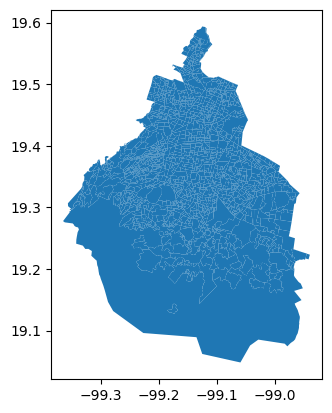

In [5]:
#importar datos

agua_cdmx = gpd.read_file('consumo_agua.json')

#primera visualizacion

agua_cdmx.plot()

In [7]:
#visualizar columnas e información general

agua_cdmx.info()

agua_cdmx.head(10)

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 1815 entries, 0 to 1814
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   cve_ent     1814 non-null   object  
 1   alcaldia    1814 non-null   object  
 2   cve_col     1814 non-null   object  
 3   colonia     1814 non-null   object  
 4   OBJECTID    1815 non-null   int32   
 5   FREQUENCY   1815 non-null   int32   
 6   SUM_cons_t  1815 non-null   float64 
 7   MEAN_cons_  1815 non-null   float64 
 8   VIV2010     1815 non-null   int32   
 9   PROMVIVCON  1815 non-null   float64 
 10  C_PROMVIVC  1815 non-null   int32   
 11  geometry    1815 non-null   geometry
dtypes: float64(3), geometry(1), int32(4), object(4)
memory usage: 141.9+ KB


,cve_ent,alcaldia,cve_col,colonia,OBJECTID,FREQUENCY,SUM_cons_t,MEAN_cons_,VIV2010,PROMVIVCON,C_PROMVIVC,geometry
0,09,AZCAPOTZALCO,02-001,AGUILERA,2,9,13759.05,56.198602,680,20.23390,4,"POLYGON ((-99.15901 19.47374, -99.15882 19.473..."
1,09,AZCAPOTZALCO,02-002,ALDANA,3,14,16423.82,59.779463,1088,15.09540,4,"POLYGON ((-99.14858 19.47156, -99.14863 19.471..."
2,09,AZCAPOTZALCO,02-005,ANGEL ZIMBRON,5,12,26043.99,162.796061,1067,24.40860,4,"POLYGON ((-99.18794 19.46458, -99.188 19.46381..."
3,09,AZCAPOTZALCO,02-006,ARENAL,6,29,30388.07,146.524032,1493,20.35370,4,"POLYGON ((-99.15187 19.46803, -99.15186 19.468..."
4,09,AZCAPOTZALCO,02-007,CENTRO DE AZCAPOTZALCO,7,33,43870.57,280.581326,1118,39.24020,5,"POLYGON ((-99.18959 19.48519, -99.18946 19.485..."
5,09,AZCAPOTZALCO,02-008,CLAVERIA,8,78,98059.70,106.186073,3563,27.52170,4,"POLYGON ((-99.18748 19.46948, -99.18636 19.469..."
6,09,AZCAPOTZALCO,02-009,COLTONGO,9,12,30894.20,562.106862,1147,26.93480,4,"POLYGON ((-99.14886 19.48098, -99.14815 19.479..."
7,09,AZCAPOTZALCO,02-010,COSMOPOLITA,10,14,9910.31,32.428024,886,11.18550,3,"POLYGON ((-99.16262 19.47638, -99.16233 19.475..."
8,09,AZCAPOTZALCO,02-011,COSMOPOLITA (AMPL),11,6,1742.08,32.223310,303,5.74944,3,"POLYGON ((-99.15901 19.47374, -99.15898 19.473..."
9,09,AZCAPOTZALCO,02-013,CUITLÁHUAC 1 Y 2 (U HAB),12,1,20515.76,419.819167,915,22.42160,4,"POLYGON ((-99.16698 19.47327, -99.16627 19.473..."


<Axes: >

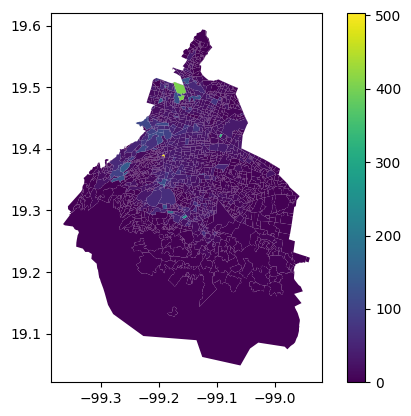

In [ ]:
#generar mapa de coropletas

agua_cdmx.plot(column='PROMVIVCON', legend=True)

In [14]:
top_10 = agua_cdmx.sort_values(by='PROMVIVCON', ascending=False).head(10)

print(top_10)

     cve_ent             alcaldia cve_col  \
169       09       ALVARO OBREGON  10-197   
29        09         AZCAPOTZALCO  02-036   
1455      09  VENUSTIANO CARRANZA  17-030   
1179      09              TLALPAN  12-215   
40        09         AZCAPOTZALCO  02-050   
1080      09              TLALPAN  12-146   
1667      09       ALVARO OBREGON  10-145   
1662      09       ALVARO OBREGON  10-248   
88        09         AZCAPOTZALCO  02-095   
608       09    GUSTAVO A. MADERO  05-129   

                                            colonia  OBJECTID  FREQUENCY  \
169                          SAN PEDRO DE LOS PINOS       972          9   
29                               INDUSTRIAL VALLEJO        32         34   
1455                INDUSTRIAL PUERTO AEREO (FRACC)      1504          4   
1179                            BELISARIO DOMINGUEZ      1193          6   
40                                 NUEVA EL ROSARIO        43          2   
1080  ROMULO SANCHEZ-SAN FERNANDO (BARR)-PEÑA PO

<Axes: >

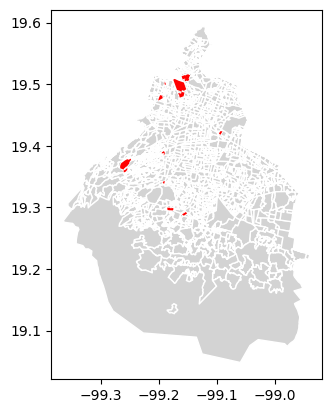

In [ ]:
#trazar mapa con top 10 de colonias que más consumen agua

ax = agua_cdmx.plot(color='lightgrey', edgecolor='white')

top_10.plot(ax=ax, color='red', legend=True)

In [19]:
#crear columna de centroide

agua_cdmx['centroide'] = agua_cdmx.geometry.centroid

#crear bucle para extraer coordenadas de los centroides

coordenadas = []

for i in agua_cdmx['centroide']:

    puntos = [i.x, i.y]
    coordenadas.append(puntos)

/var/folders/xy/v740y63s1l30bd2kgvzmnfr00000gn/T/ipykernel_62034/3012815267.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  agua_cdmx['centroide'] = agua_cdmx.geometry.centroid


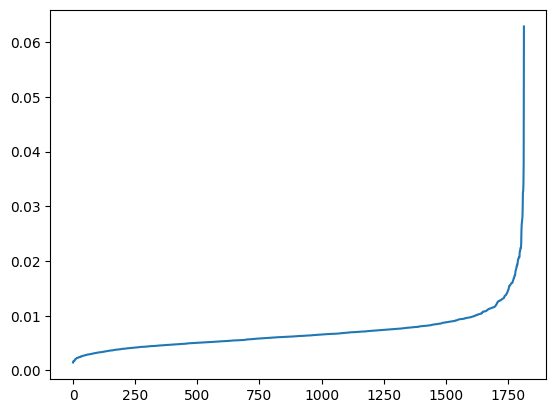

In [ ]:

#determinar valor óptimo de eps para DBSCAN

calibrador = NearestNeighbors(n_neighbors=5).fit(coordenadas)

#obtener distancias e índices de los vecinos más cercanos

distancias, indices = calibrador.kneighbors(coordenadas)

#extraer distancias al vecino más cercano

distancias_quito_vecino = distancias[:,-1]

#ordenar distancias

ditancias_ordenadas = np.sort(distancias_quito_vecino)

#graficar distancias ordenadas

plt.pyplot.plot(ditancias_ordenadas)

In [25]:
#entrenar el modelo de clustering

clustering_agua = DBSCAN(eps=0.01, min_samples=5).fit(coordenadas)

#agregar etiquetas de cluster al GeoDataFrame

agua_cdmx['cluster'] = clustering_agua.labels_

#analizar el número de clusters

agua_cdmx['cluster'].value_counts()

cluster
 0    1648
-1     107
 2      22
 3      15
 5       9
 1       8
 4       6
Name: count, dtype: int64

<Axes: >

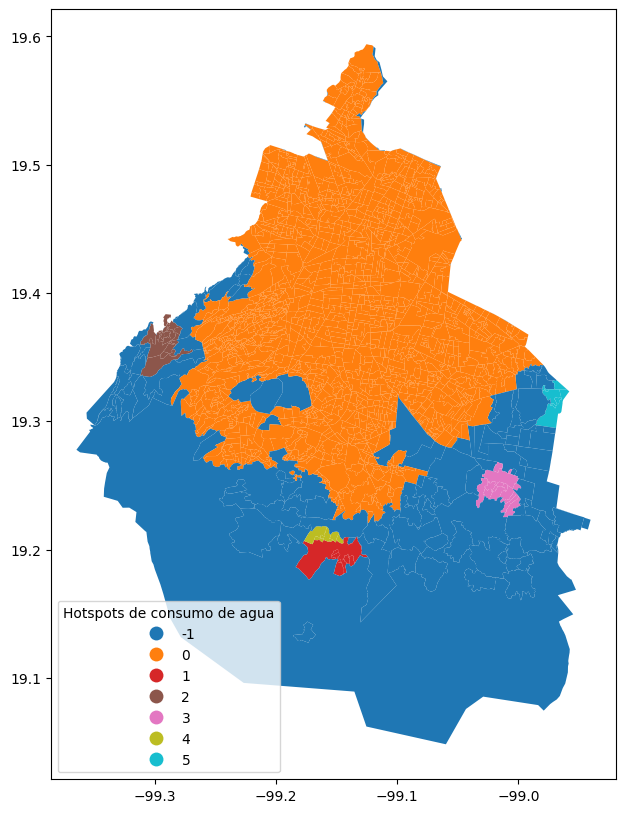

In [ ]:
#graficar los clusters en el mapa

agua_cdmx.plot(column='cluster', categorical=True, legend=True, figsize=(15, 10), cmap='tab10', legend_kwds={'title': 'Hotspots de consumo de agua', 'loc': 'lower left'})

In [ ]:
#revisar consumo promedio por cluster

cluster_1 = agua_cdmx.groupby('cluster')['PROMVIVCON'].get_group(1).mean()
print('Promedio clúster 1:', cluster_1)

cluster_2 = agua_cdmx.groupby('cluster')['PROMVIVCON'].get_group(2).mean()
print('Promedio clúster 2:', cluster_2)

cluster_3 = agua_cdmx.groupby('cluster')['PROMVIVCON'].get_group(3).mean()
print('Promedio clúster 3:', cluster_3)

cluster_4 = agua_cdmx.groupby('cluster')['PROMVIVCON'].get_group(4).mean()
print('Promedio clúster 4:', cluster_4)

cluster_5 = agua_cdmx.groupby('cluster')['PROMVIVCON'].get_group(5).mean()
print('Promedio clúster 5:', cluster_5)

Promedio clúster 1: 0.018153
Promedio clúster 2: 13.890884999999999
Promedio clúster 3: 1.0795616000000001
Promedio clúster 4: 0.0
Promedio clúster 5: 0.40597788888888886


In [ ]:
#extraer los valores de consumo

consumo = agua_cdmx['PROMVIVCON'].values.reshape(-1, 1)

#hacer un array 3D con coordenadas y consumo

datos_3d = np.hstack((coordenadas, consumo))

In [65]:
#definir el escalador

scaler = StandardScaler()

datos_3d_scaled = scaler.fit_transform(datos_3d)

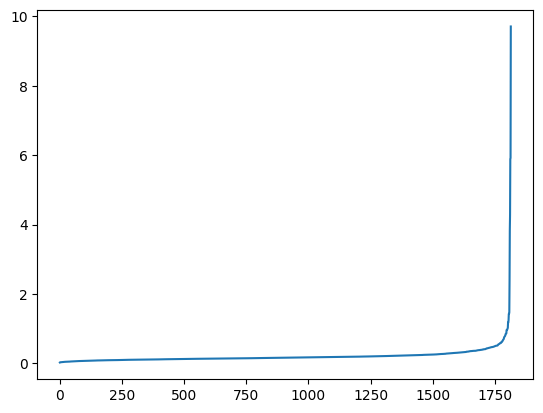

In [ ]:

#determinar valor óptimo de eps para DBSCAN con datos escalados

calibrador_scaled = NearestNeighbors(n_neighbors=5).fit(datos_3d_scaled)

#obtener distancias e índices de los vecinos más cercanos

distancias, indices = calibrador_scaled.kneighbors(datos_3d_scaled)

#extraer distancias al vecino más cercano

distancias_scaled = distancias[:,-1]

#ordenar distancias

ditancias_ordenadas_scaled = np.sort(distancias_scaled)

#graficar distancias ordenadas

plt.pyplot.plot(ditancias_ordenadas_scaled)

In [73]:
#entrenar el modelo de clustering con datos escalados

clustering_agua_scaled = DBSCAN(eps=0.5, min_samples=5).fit(datos_3d_scaled)

#agregar etiquetas de cluster al GeoDataFrame

agua_cdmx['cluster_scaled'] = clustering_agua_scaled.labels_

#analizar el número de clusters

agua_cdmx['cluster_scaled'].value_counts()

cluster_scaled
 0    1770
-1      34
 1       6
 2       5
Name: count, dtype: int64

<Axes: >

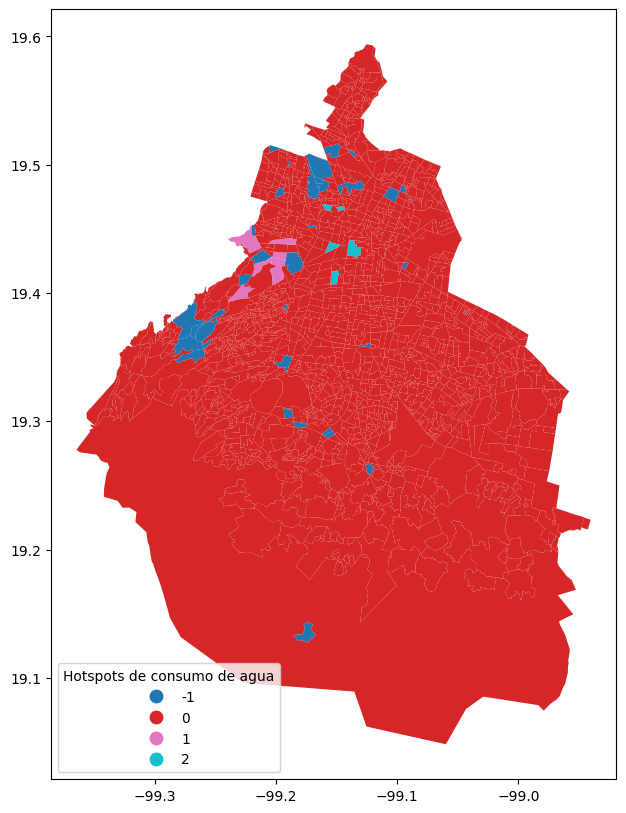

In [74]:
#graficar los clusters en el mapa

agua_cdmx.plot(column='cluster_scaled', categorical=True, legend=True, figsize=(15, 10), cmap='tab10', legend_kwds={'title': 'Hotspots de consumo de agua', 'loc': 'lower left'})